The aim is to plot noisy classical simulation results.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
if "PLOT_MATERIAL" not in os.listdir():
  %mkdir "PLOT_MATERIAL"

Retrieve simulation results



In [23]:
dir = '../result/'
data_names = ['4_sites','6_sites','8_sites','10_sites','12_sites']
#dir_names = ['0720_1434_okuda','0720_1357_okuda','0720_0850_okuda','0724_2034_okuda','0715_1644_okuda']
dir_names = ['0720_0838_okuda','0719_1707_okuda','0719_1634_okuda','0713_1219_okuda','0712_1748_okuda']
result_dirs = [dir+'/'+dir_names[0],dir+'/'+dir_names[1],dir+'/'+dir_names[2],dir+'/'+dir_names[3],dir+'/'+dir_names[4]]
for j in range(len(data_names)):
  if result_dirs[j] not in sys.path:
    sys.path.append(result_dirs[j])  

In [24]:
def is_number(st):
  try:
    float(st)
    return True
  except ValueError:
    return False
        
para_dic_list = [{} for each in data_names] 
for j in range(len(data_names)):
  print("j =",j)
  with open('{}/{}'.format(result_dirs[j],'config.txt'),'r') as f1:
    content = f1.readlines()
  with open('./PLOT_MATERIAL/config_{}.py'.format(data_names[j]),'w') as f2:
    for i in range(2):
      pass
    for i in range(len(content)-5):
      line_as_list = content[2+i].split()
      if line_as_list[1] == "=":
        s = ""
        for k in range(2,len(line_as_list)):
          s = s + line_as_list[k]
        para_dic_list[j].update({line_as_list[0]:s}) 
      else:
        s = ""
        for k in range(1,len(line_as_list)):
          s = s + line_as_list[k]
        para_dic_list[j].update({line_as_list[0]:s})
      f2.write(line_as_list[0]+" = ")
      for each in line_as_list[2:]:
        if is_number(each) or each[0]=='[' or each[-1]==']' or each=='True' or each=='False' or each[-1]==',':
          f2.write(each)
        else:
          f2.write('\'')
          f2.write(each)
          f2.write('\'')
        f2.write(' ')
      f2.write('\n')

j = 0
j = 1
j = 2
j = 3
j = 4


In [25]:
print("Different parameters:\n")
for each in para_dic_list[0].keys():
  equality = True
  for j in range(1,len(data_names)):
    if each not in para_dic_list[j].keys():
      equality = False
      para_dic_list[j].update({each:'None'})
    if para_dic_list[0][each] != para_dic_list[j][each]:
      equality = False
  if equality == False:
    print(each,": ",[para_dic_list[j][each] for j in range(len(data_names))])

Different parameters:

site :  ['4', '6', '8', '10', '12']
initial_layout :  ['[12,13,14,16]', '[12,13,14,16,19,22]', '[12,13,14,16,19,22,25,24]', '[12,13,14,16,19,22,25,24,23,21]', '[12,13,14,16,19,22,25,24,23,21,18,15]']


In [26]:
def pauliopexp(pauliop,ini_st):
  exp = 1
  for position in range(len(pauliop)):
    if pauliop[position] == ini_st[position][1]:
        exp *= (-1)**ini_st[position][0]
    if pauliop[position] == "I": 
        continue
    if pauliop[position] != "I" and pauliop[position] != ini_st[position][1]:
        exp = 0
        break
  return exp 

In [27]:
if './SCRIPT' not in sys.path: sys.path.append('./SCRIPT')
ans_lists = [[] for each in data_names]
ans_exact_list = []
stat_unc_lists = [[] for each in data_names]
for j in range(len(data_names)):
  print("j =",j)
  g = open('../result/.current_result_dir.txt', 'w')
  g.write('{}'.format(result_dirs[j]))
  g.close()
  %cp './PLOT_MATERIAL/config_{data_names[j]}.py' './GENERATED/parameters.py'
  ! python3 ./SCRIPT/get_coef.py
  with open('./GENERATED/coefficients.dat') as f:
    original = f.readlines()
  
  if para_dic_list[j]['initial_state'] == 'Neel':
        ini_st = [[(k+1)%2,'Z'] for k in range(int(para_dic_list[j]['site']))]
  if para_dic_list[j]['initial_state'] == 'file':  
        with open('{}/initial_state.txt'.format(result_dirs[j]),'r') as g:
            bit_string = g.readline().split()
            pauli_string = g.readline().split()
        ini_st = [ [ int(bit_string[k]), pauli_string[k] ] for k in range(int(para_dic_list[j]['site'])) ]

  for i in range(int(para_dic_list[0]['step_initial']),int(para_dic_list[j]['trotter_step'])+1):
    ans = 0
    g = open('{}/LOCAL_OBS/local_obs_res_{}.txt'.format(result_dirs[j],i), 'r')
    result = g.readlines()
    g.close()
    ans_exact = 0
    for k in range(len(original)):
        degree, coeff, pauliop = original[k].split()
        res = float(result[k])
        degree = int(degree)
        coeff = int(coeff)
        ans += res * (float(para_dic_list[j]['delta']) ** degree) * coeff
        ans_exact += pauliopexp(pauliop,ini_st) * (float(para_dic_list[j]['delta']) ** degree) * coeff
    ans_lists[j].append(ans)
    if i == 0:
      ans_exact_list.append(ans_exact)

print("ans_exact_list =",ans_exact_list)  

j = 0
j = 1
j = 2
j = 3
j = 4
ans_exact_list = [-3.808622169354906, -5.712933254032357, -7.61724433870981, -9.521555423387262, -11.425866508064715]


In [28]:
#%%script false 
for j in range(len(data_names)):
  print("j =",j)
  print(ans_lists[j])

j = 0
[-3.702344354647307, -3.1766818584842085, -3.118580166169983, -2.910905377020216, -2.445156150634905, -2.196504312376021, -1.7450186246741133, -1.4983822150245674, -1.2723244171375476, -0.8279045159680747, -0.5192382466622297, -0.5680178592560725, -0.5802061314121258, -0.42306619216192126, -0.366762463006229, -0.18068846997213336]
j = 1
[-5.537140356809043, -4.5037829814155215, -4.474176868659179, -4.0034007534827545, -3.1170546302513356, -2.3607444135697295, -1.960511205165436, -1.3319975008955185, -0.8537488732357216, -0.7528343154690371, -0.5072058798093296, -0.5477257948779055, -0.305055048397399, -0.23297289296395482, -0.2774091757828118, -0.07873579090217281]
j = 2
[-7.386864961005725, -5.555913572703818, -4.9948942090030135, -2.926531487152688, -1.4889774110168947, -1.243188802834565, -0.724439740205489, -0.5241330871439608, -0.2374595058639123, -0.26825043696377604, -0.006513234990961339, -0.06549120547734655, -0.07614386321515196, 0.10543115328559483, 0.0847660410776675,

Fit and plot

steps = range(0, 16)
j = 0
len(vals) = 16
ans_exact_list[j] = -3.808622169354906
ans_exact_list[j]/cs[j] = -7.617244338709812
j = 1
len(vals) = 16
ans_exact_list[j] = -5.712933254032357
ans_exact_list[j]/cs[j] = -5.712933254032357
j = 2
len(vals) = 16
ans_exact_list[j] = -7.61724433870981
ans_exact_list[j]/cs[j] = -3.808622169354905
j = 3
len(vals) = 16
ans_exact_list[j] = -9.521555423387262
ans_exact_list[j]/cs[j] = -5.289753012992923
j = 4
len(vals) = 16
ans_exact_list[j] = -11.425866508064715
ans_exact_list[j]/cs[j] = -7.141166567540447
./PLOT_MATERIAL/0720_0838_okuda_0719_1707_okuda_0719_1634_okuda_0713_1219_okuda_0712_1748_okuda.pdf
Thu Jul 28 23:45:27 JST 2022


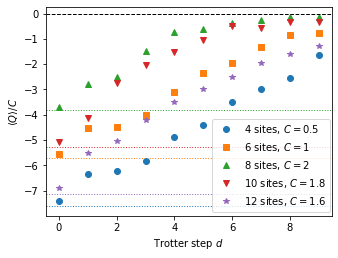

In [31]:
import scipy.optimize
from scipy.optimize import curve_fit,leastsq

###  Adjust colors, labels, markers, and ylabel according to your choice
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
#cs = [1.5,1.1,2,2,1.6]
cs = [0.5,1,2,1.8,1.6]
labels =  [f'4 sites, $C={cs[0]}$',f'6 sites, $C={cs[1]}$',f'8 sites, $C={cs[2]}$',f'10 sites, $C={cs[3]}$',f'12 sites, $C={cs[4]}$']
markers = ["o","s","^","v","*"]
ylabel = r"$ \langle Q\rangle/C$" 
sign_overall = +1

steps =  range(int(para_dic_list[0]['step_initial']),int(para_dic_list[0]['trotter_step'])+1)
print("steps =",steps)
def exp_func(step, v0, rate, shift):
  return v0 * np.exp(-rate * step) + shift

def sign_st(value):
  if np.sign(value) == +1: return "+"
  if np.sign(value) == -1: return "-"
  else: return "0"

for j in range(0,len(data_names)):
  print("j =",j)
  vals = sign_overall* np.array(ans_lists[j])
  print("len(vals) =",len(vals))
  unc_array = sign_overall*np.array(stat_unc_lists[j])

  ### Plot
  plt.plot(steps[:10],vals[:10]/cs[j],color=colors[j], marker=markers[j],label=labels[j],linestyle="none")

  ### Draw a horizontal line

  plt.axhline(y = ans_exact_list[j]/cs[j], color = colors[j], linestyle = ':',linewidth=1)
  print("ans_exact_list[j] =",ans_exact_list[j])
  print("ans_exact_list[j]/cs[j] =",ans_exact_list[j]/cs[j])


plt.axhline(y = 0, color = 'black' , linestyle = 'dashed',linewidth=1)
plt.xlabel(r"Trotter step $d$")
plt.ylabel(ylabel)

file_name = ''
for j in range(len(data_names)):
  file_name += dir_names[j]
  file_name += "_"

plt.legend(loc = (0.58,0.02))
fig = plt.gcf()
fig.set_size_inches(0.8*6.4,0.8*4.8)
file_name_full = '{}/{}.pdf'.format('./PLOT_MATERIAL',file_name[:-1])
print(file_name_full)
plt.savefig(file_name_full)
!date 